# DBSCAN -- Density-based spatial clustering of applications with noise

#### dbscan is the clustering technique used to form cluster it is very robust technique to detect outliers as compared with k-mean and hierarchical clustering 



#### we have to find optimal value of epsilon and minpoint to form cluster


### thumb rule to find minpoint

#### The larger the data set, the larger the value of MinPts should be 

#### If the data set is noisier, choose a larger value of MinPts

#### Generally, MinPts should be greater than or equal to the dimensionality of the data set

#### For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).

#### If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998)

#### The value of minPoints should be at least one greater than the number of dimensions of the dataset, i.e., 

#### minPoints>=Dimensions+1.

### Epsilon (ε) 
### After you select your MinPts value, you can move on to determining ε. One technique to automatically determine the optimal ε value is described in this paper. This technique calculates the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In [113]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN



#### we apply the dbscan cluter on iris dataset

In [16]:
iris = datasets.load_iris()

In [23]:
iris_input_features=pd.DataFrame(iris.data)

In [27]:
iris_input_features=iris_input_features[[0,1]]

####  I use two input features to perform clustering

In [41]:
iris.feature_names 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### minPts is selected based on the domain knowledge. If you do not have domain understanding, a rule of thumb is to derive minPts from the number of dimensions D in the data set. minPts >= D + 1. For 2D data, take minPts = 4. For larger datasets, with much noise, it suggested to go with minPts = 2 * D.

#### I used minpts as 4

#### Let’s plot these data points and see how they look in the feature space. Here, I use the scatter plot for plotting these data points. Use the following syntax:

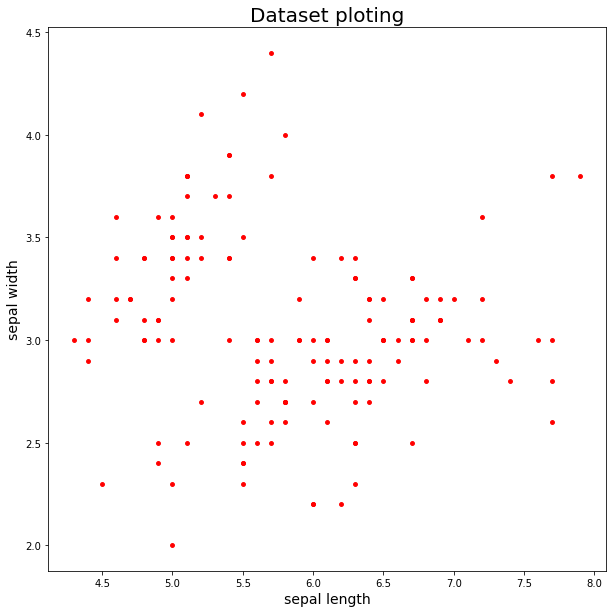

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(iris_input_features[0],iris_input_features[1],s=15,color='red') ## s=15 is the size of dots 
plt.title('Dataset ploting',fontsize=20)
plt.xlabel('sepal length',fontsize=14)
plt.ylabel('sepal width',fontsize=14)
plt.show()

#### here n_neighbors=4 is the minpoints taken to draw neighbours

In [80]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(iris_input_features[[0,1]])
distances, indices = nbrs.kneighbors(iris_input_features[[0,1]])


#### here 150 are the data points and 4 is the n_neighbour value (distance between a point and its  neighbours)

In [56]:
distances.shape 

(150, 4)

In [88]:
pd.DataFrame(distances,columns=["neigh_itself","neigh_2","neigh_3","neigh_4"]).head(10)

,neigh_itself,neigh_2,neigh_3,neigh_4
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.1
5,0.0,0.0,0.0,0.1
6,0.0,0.0,0.0,0.1
7,0.0,0.0,0.0,0.1
8,0.0,0.0,0.0,0.1
9,0.0,0.0,0.0,0.1


#### Let’s plot our K-distance graph and find the value of epsilon. Use the following syntax:



In [81]:
distances = np.sort(distances, axis=0)


In [87]:
distances

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.        , 0.        , 0.1       ],
       [0.        , 0.        , 0.1       , 0.1       ],
       [0.        , 0.        ,

In [90]:
distance = distances[:,1]
distance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1    

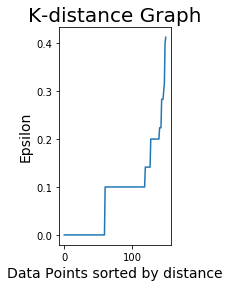

In [112]:
plt.figure(figsize=(2,4))
plt.plot(distances[:,1])
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

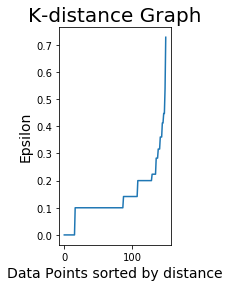

In [111]:
plt.figure(figsize=(2,4))
plt.plot(distances[:,2])
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

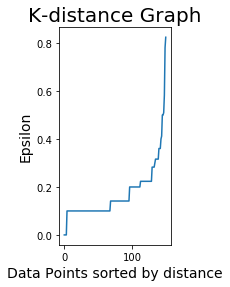

In [110]:
plt.figure(figsize=(2,4))
plt.plot(distances[:,3])
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

####  lets check epsilon on 0.3 and 0.2

### take epsilon as 0.2

In [114]:
dbscan_opt=DBSCAN(eps=0.2,min_samples=4)# min_samples is the min points in the data which lies in eps circle
dbscan_opt.fit(iris_input_features[[0,1]])

DBSCAN(eps=0.2, min_samples=4)

In [116]:
iris_input_features['DBSCAN_opt_labels']=dbscan_opt.labels_
iris_input_features['DBSCAN_opt_labels'].value_counts()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 2    48
-1    43
 0    31
 3    24
 1     4
Name: DBSCAN_opt_labels, dtype: int64

#### The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0, 1 ,2 and 3 are the four different clusters, and -1 is the noise. Let’s plot the results and see what we get.

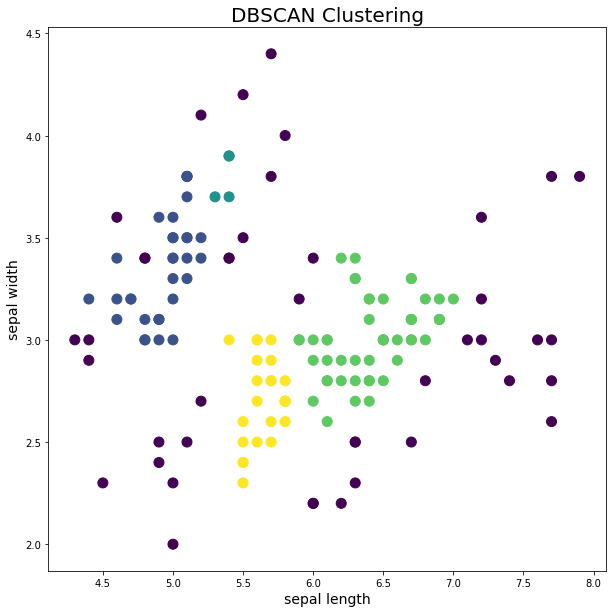

In [120]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(iris_input_features[0],iris_input_features[1],c=iris_input_features['DBSCAN_opt_labels'],s=100)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('sepal length',fontsize=14)
plt.ylabel('sepal width',fontsize=14)
plt.show()

### take epsilon as 0.3


In [121]:
dbscan_opt=DBSCAN(eps=0.3,min_samples=4)# min_samples is the min points in the data which lies in eps circle
dbscan_opt.fit(iris_input_features[[0,1]])

DBSCAN(eps=0.3, min_samples=4)

In [122]:
iris_input_features['DBSCAN_opt_labels_1']=dbscan_opt.labels_
iris_input_features['DBSCAN_opt_labels_1'].value_counts()

 1    90
 0    45
-1     9
 2     6
Name: DBSCAN_opt_labels_1, dtype: int64

#### The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0, 1 ,and 2 are the three different clusters, and -1 is the noise. Let’s plot the results and see what we get.

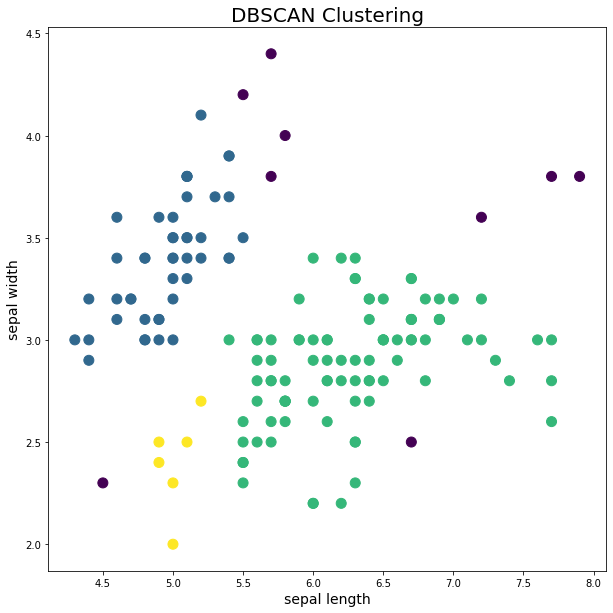

In [125]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(iris_input_features[0],iris_input_features[1],c=iris_input_features['DBSCAN_opt_labels_1'],s=100)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('sepal length',fontsize=14)
plt.ylabel('sepal width',fontsize=14)
plt.show()